#  🪼FREQUENCE PULSATION DES MEDUSES

## 🧭 Étape 1 — Récupérer tous les fichiers .txt du dossier

In [23]:
import glob
import os

# Dossier contenant toutes les frames .txt
folder_path = "D:/M1/ter_data/cleaned_labels"

# Liste triée pour garantir l’ordre temporel (frame_00000.txt, frame_00001.txt, etc.)
txt_files = sorted(glob.glob(os.path.join(folder_path, "*.txt")))

print(f"{len(txt_files)} fichiers trouvés.")
print("Exemple :", txt_files[:3])


1442 fichiers trouvés.
Exemple : ['D:/M1/ter_data/cleaned_labels\\frame_00000.txt', 'D:/M1/ter_data/cleaned_labels\\frame_00001.txt', 'D:/M1/ter_data/cleaned_labels\\frame_00002.txt']


## 📄 Étape 2 — Afficher les données de la première frame

In [24]:
import pandas as pd

# Lecture de la première frame
first_frame = pd.read_csv(txt_files[0], sep=" ", header=None)
first_frame.columns = ["class_id", "x_center", "y_center", "width", "height"]
first_frame.head()


,class_id,x_center,y_center,width,height
0,0,0.886068,0.990509,0.004948,0.008796
1,0,0.144792,0.796991,0.005208,0.006944
2,0,0.320312,0.784259,0.004167,0.006481
3,0,0.606510,0.754398,0.003646,0.006944
4,0,0.016406,0.593519,0.004687,0.008333


## 🧱 Étape 3 — Mettre toutes les frames dans une seule DataFrame

Chaque ligne = une méduse, chaque colonne = une mesure sur une frame.

In [27]:
# On stocke les frames dans une liste
frames = []

for i, f in enumerate(txt_files):
    df = pd.read_csv(f, sep=" ", header=None)
    df.columns = ["class_id", "x_center", "y_center", "width", "height"]
    df["frame"] = i  # index temporel
    frames.append(df)

# Concaténer toutes les frames
data = pd.concat(frames, ignore_index=True)
data.head(25)


,class_id,x_center,y_center,width,height,frame
0,0,0.886068,0.990509,0.004948,0.008796,0
1,0,0.144792,0.796991,0.005208,0.006944,0
2,0,0.320312,0.784259,0.004167,0.006481,0
3,0,0.606510,0.754398,0.003646,0.006944,0
4,0,0.016406,0.593519,0.004687,0.008333,0
5,0,0.601302,0.572917,0.006771,0.008796,0
6,0,0.063411,0.524769,0.003385,0.008796,0
7,0,0.886589,0.990741,0.004948,0.008333,1
8,0,0.145443,0.797685,0.005469,0.007407,1
9,0,0.320833,0.783565,0.004167,0.006019,1


## 📊 Étape 4 — Visualiser la taille (width × height) à travers les frames

### Pour chaque méduse (donc pour chaque ligne), on trace une courbe représentant son évolution.

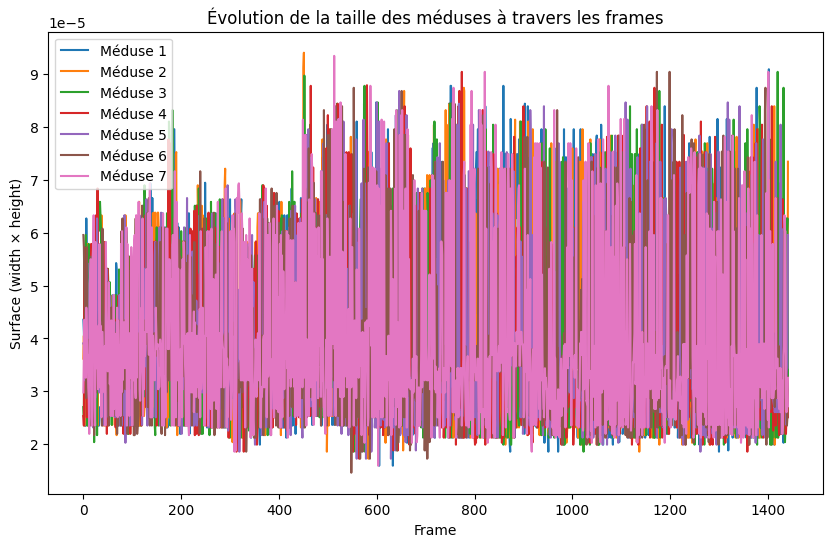

In [34]:
import matplotlib.pyplot as plt

# Calcul de la surface
data["area"] = data["width"] * data["height"]

# Tracer une courbe par méduse
plt.figure(figsize=(10,6))
for jelly_id in data.index.unique()[:len(first_frame)]:
    subset = data[data.index % len(first_frame) == jelly_id]
    plt.plot(subset["frame"], subset["area"], label=f"Méduse {jelly_id+1}")

plt.xlabel("Frame")
plt.ylabel("Surface (width × height)")
plt.title("Évolution de la taille des méduses à travers les frames")
plt.legend()
plt.show()


### Visualiser sur les 200 premières frames

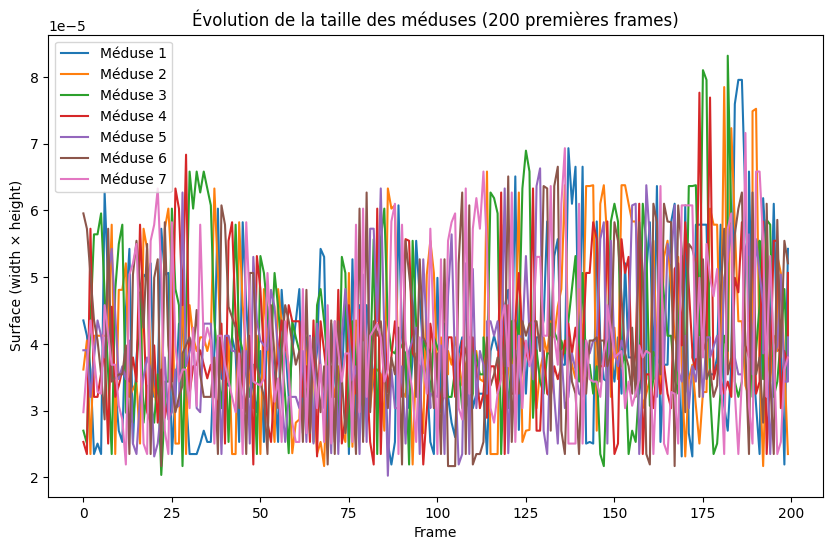

In [35]:
# Filtrer uniquement les 200 premières frames
subset_200 = data[data["frame"] < 200]

plt.figure(figsize=(10,6))
n_jelly = len(first_frame)

for jelly_id in range(n_jelly):
    subset = subset_200.iloc[jelly_id::n_jelly]
    plt.plot(subset["frame"], subset["area"], label=f"Méduse {jelly_id+1}")

plt.xlabel("Frame")
plt.ylabel("Surface (width × height)")
plt.title("Évolution de la taille des méduses (200 premières frames)")
plt.legend()
plt.show()


### Visualiser sur les 100 premières frames

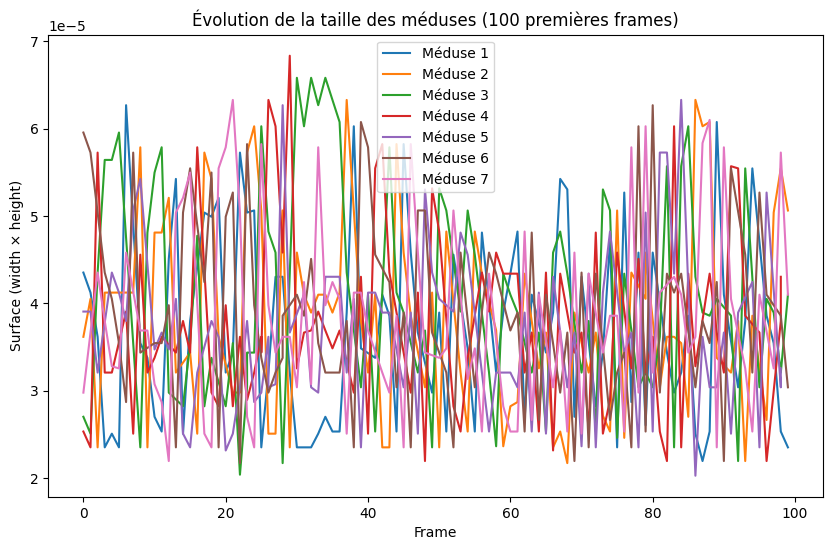

In [36]:
# Filtrer uniquement les 100 premières frames
subset_100 = data[data["frame"] < 100]

plt.figure(figsize=(10,6))
n_jelly = len(first_frame)

for jelly_id in range(n_jelly):
    subset = subset_100.iloc[jelly_id::n_jelly]
    plt.plot(subset["frame"], subset["area"], label=f"Méduse {jelly_id+1}")

plt.xlabel("Frame")
plt.ylabel("Surface (width × height)")
plt.title("Évolution de la taille des méduses (100 premières frames)")
plt.legend()
plt.show()


### Visualiser sur les 50 premières frames

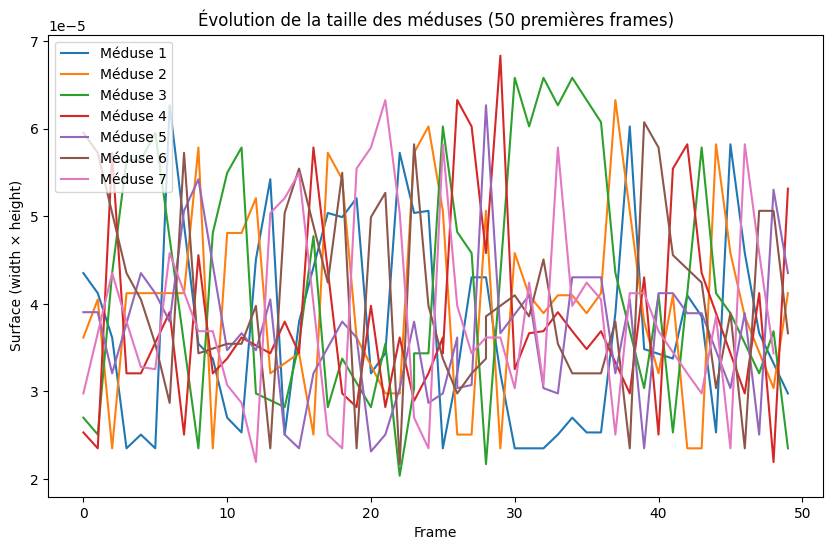

In [37]:
# Filtrer uniquement les 50 premières frames
subset_50 = data[data["frame"] < 50]

plt.figure(figsize=(10,6))
n_jelly = len(first_frame)

for jelly_id in range(n_jelly):
    subset = subset_50.iloc[jelly_id::n_jelly]
    plt.plot(subset["frame"], subset["area"], label=f"Méduse {jelly_id+1}")

plt.xlabel("Frame")
plt.ylabel("Surface (width × height)")
plt.title("Évolution de la taille des méduses (50 premières frames)")
plt.legend()
plt.show()


### Visualiser sur les 25 premières frames

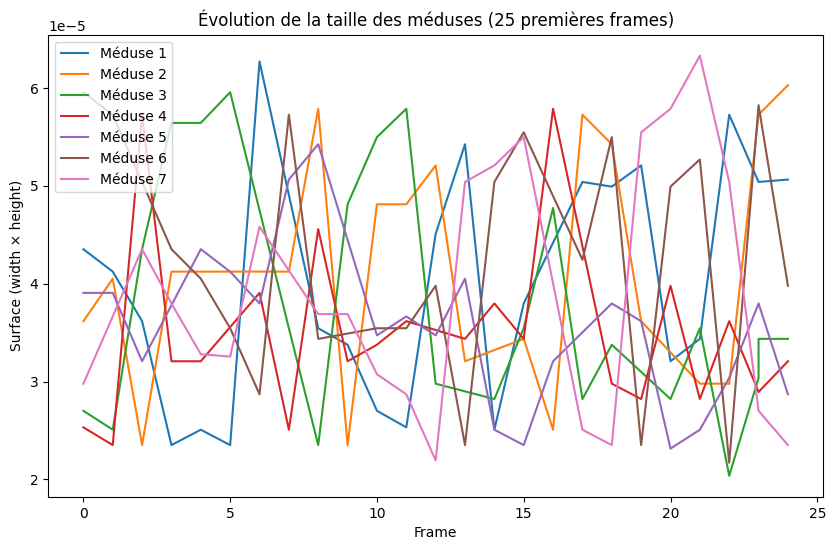

In [38]:
# Filtrer uniquement les 25 premières frames
subset_25 = data[data["frame"] < 25]

plt.figure(figsize=(10,6))
n_jelly = len(first_frame)

for jelly_id in range(n_jelly):
    subset = subset_25.iloc[jelly_id::n_jelly]
    plt.plot(subset["frame"], subset["area"], label=f"Méduse {jelly_id+1}")

plt.xlabel("Frame")
plt.ylabel("Surface (width × height)")
plt.title("Évolution de la taille des méduses (25 premières frames)")
plt.legend()
plt.show()


### Visualiser sur les 10 premières frames

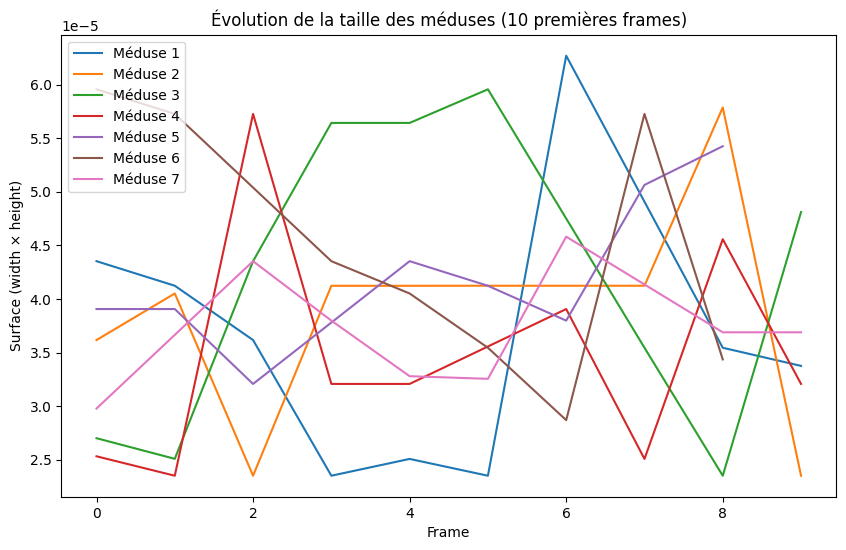

In [39]:
# Filtrer uniquement les 10 premières frames
subset_10 = data[data["frame"] < 10]

plt.figure(figsize=(10,6))
n_jelly = len(first_frame)

for jelly_id in range(n_jelly):
    subset = subset_10.iloc[jelly_id::n_jelly]
    plt.plot(subset["frame"], subset["area"], label=f"Méduse {jelly_id+1}")

plt.xlabel("Frame")
plt.ylabel("Surface (width × height)")
plt.title("Évolution de la taille des méduses (10 premières frames)")
plt.legend()
plt.show()


## 🎵 Étape 5 — Calculer la fréquence d’oscillation de chaque méduse

On peut estimer la fréquence à partir de la série temporelle area(frame).

Méthode simple : compter le nombre de pics (valeurs locales maximales) → correspond à une pulsation.

In [40]:
from scipy.signal import find_peaks

frequences = {}

for jelly_id in range(len(first_frame)):
    subset = data[data.index % len(first_frame) == jelly_id]
    y = subset["area"].values

    peaks, _ = find_peaks(y)
    n_peaks = len(peaks)
    freq = n_peaks / len(txt_files)  # fréquence relative (en oscillation / frame)
    frequences[jelly_id] = freq

print(frequences)


{0: 0.3217753120665742, 1: 0.32038834951456313, 2: 0.30998613037447986, 3: 0.33495145631067963, 4: 0.33841886269070737, 5: 0.3377253814147018, 6: 0.32524271844660196}
